In [0]:
!git clone https://github.com/MrPranav101/Multi-label-Classifier-on-Privacy-Policies-

Cloning into 'Multi-label-Classifier-on-Privacy-Policies-'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 168 (delta 58), reused 97 (delta 23), pack-reused 0
Receiving objects: 100% (168/168), 5.86 MiB | 4.54 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [0]:
ls

drive/  sample_data/


In [0]:
cd Multi-label-Classifier-on-Privacy-Policies-/

/content/Multi-label-Classifier-on-Privacy-Policies-


In [0]:
cd Deep-Learning-models/

/content/Multi-label-Classifier-on-Privacy-Policies-/Deep-Learning-models


In [0]:
import sys
import pandas as pd
sys.path.insert(1, '..')
from utils.data_prep import data_clean
# print(sys.path)
path_to_data = "../../drive/My Drive/dataset/dataset/data.txt"
path_to_label = "../../drive/My Drive/dataset/dataset/labels.xlsx"

df = data_clean(path_to_data, path_to_label)

In [0]:
df['Privacy_Policies_split'] = df['Privacy_Policies'].apply(lambda x: x.split('.'))

In [0]:
# df['Privacy_Policies_split']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np

In [0]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')

In [0]:
dubby= df['Privacy_Policies_split'][0]

In [0]:
dtm=vect.fit_transform(df['Privacy_Policies_split'][0])

In [0]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,able,access,accessed,accessible,accessing,accidentally,accordance,account,accounting,accuracy,accurate,achieve,acquire,acting,actions,activities,activity,actual,addition,additionally,address,adequacy,adequate,adjust,administer,administration,advertisements,advertising,advise,advisers,adwords,affect,afforded,agents,aggregate,aggregated,aggregators,aims,alert,allow,...,unlawfully,unrelated,updated,updates,usa,usage,use,user,username,users,uses,usually,utilise,vendors,verify,version,versions,videos,view,visit,visited,visitor,visitors,visits,visium,want,way,ways,webprospects,website,websites,welcome,wish,withdraw,work,working,works,workshop,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
lda=LatentDirichletAllocation(n_components=9)

In [0]:
lda_dtf=lda.fit_transform(dtm)

In [0]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [0]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=9ea58e6ef69177bace623c3a006cf358016e5c88df2beaa7d2d967cef66e2180
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn
mglearn.tools.print_topics(topics=range(9), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
marketing     consent       data          data          products      
privacy       withdraw      request       personal      cell          
genomics      changes       business      privacy       service       
notice        parties       site          purposes      single        
responsible   time          notify        use           data          
company       site          applicable    notice        product       
preferences   contacting    best          process       use           
group         service       breach        set           genomics      
relevant      business      basis         parties       privacy       
data          usage         legal         business      case          


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------      
data          data          data

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
topic_0=np.argsort(lda_dtf[:,0])[::-1]
for i in topic_0[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 opting you ask parties stop sending marketing messages time logging site checking unchecking relevant boxes adjust marketing preferences following opt links marketing message sent contacting time.

 this privacy notice issued behalf x genomics group mention x company privacy notice referring relevant company x genomics group responsible processing data.

 marketing communications data includes preferences receiving marketing parties communication preferences.

 in cases demonstrate compelling legitimate grounds process information override rights freedoms.



In [0]:
topic_1=np.argsort(lda_dtf[:,1])[::-1]
for i in topic_1[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 third party marketing we express opt consent share personal data company outside x genomics group marketing purposes.

 we additionally source publications grant funding databases preprint servers conference symposium programs public directories.

 performance contract means processing data necessary performance contract party steps request entering contract.

 note able comply request erasure specific legal reasons notified applicable time request.



In [0]:
topic_2=np.argsort(lda_dtf[:,2])[::-1]
for i in topic_2[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 professional advisers acting processors joint controllers including lawyers bankers auditors insurers based us eu provide consultancy banking legal insurance accounting services united states revenue customs regulators authorities acting processors joint controllers based united states require reporting processing activities certain circumstances.

 we collect use store transfer different kinds personal data grouped follows identity data includes maiden username similar identifier marital status title date birth gender.

com decibio identity contact data publicly availably sources published works including limited printed electronic publications.

 where use providers based us transfer data privacy shield requires provide similar protection personal data individuals eu.



In [0]:
topic_3=np.argsort(lda_dtf[:,3])[::-1]
for i in topic_3[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 stoneridge mall road pleasanton ca telephone number you right complaint time relevant data protection supervisory authority example uk supervisory authority data protection called information commissioner office ico.

 for example aggregate usage data calculate percentage users accessing specific feature site.

 please note process personal data knowledge consent compliance rules required permitted law.

 third party links this site include links party websites plug ins applications.



In [0]:
topic_4=np.argsort(lda_dtf[:,4])[::-1]
for i in topic_4[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 we appreciate chance deal concerns approach relevant supervisory authority contact instance.

 this enables ask delete remove personal data good reason continuing process it.

 if wish explanation processing new purpose compatible original purpose contact us.

 this security measure ensure personal data disclosed person right receive it.



In [0]:
topic_5=np.argsort(lda_dtf[:,5])[::-1]
for i in topic_5[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 opting you ask parties stop sending marketing messages time logging site checking unchecking relevant boxes adjust marketing preferences following opt links marketing message sent contacting time.

 lawful basis for processing legitimate interest means business conducting managing business enable best service product best secure experience.

 the data protection law individuals european union eu change may effective date general data protection regulation gdpr.

 in circumstances anonymise personal data longer associated research statistical purposes case use information indefinitely notice you.



In [0]:
topic_6=np.argsort(lda_dtf[:,6])[::-1]
for i in topic_6[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 please contact need details specific legal ground relying process personal data ground set table purpose activity type data lawful basis processing including basis legitimate to register new customer such relation purchase goods services b such relation signing receive updates identity b contact performance contract b necessary legitimate interests develop products services grow business to process deliver order including manage payments fees charges b collect recover money owed identity b contact c financial d transaction e marketing communications performance contract b necessary legitimate interests recover debts to manage relationship include notifying changes terms privacy policy b asking leave review survey identity b contact c profile d marketing communications performance contract b necessary comply legal obligation c necessary legitimate interests records updated study customers use products services to administer protect business site including troubleshooting data analysis 

In [0]:
topic_7=np.argsort(lda_dtf[:,7])[::-1]
for i in topic_7[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

x genomics navigation products products single cell products single cell gene expression crispr screening cell surface protein single cell immune profiling antigen specificity cell surface protein single cell atac single cell cnv spatial products spatial gene expression linked reads products genome sequencing exome sequencing novo assembly platform technology next gem technology visium technology instruments chromium controller chromium connect partners compatible products find x compatible products certified service providers find service provider become service provider global distributors distributors research areas research areas cancer immunology neuroscience resources resources publications datasets videos literature x university x pert workshop series support documentation customer developed protocols community blog forums support company about us our mission our team board careers x investors contact us news events in news blog events x pert workshop series x genomics privacy p

In [0]:
topic_8=np.argsort(lda_dtf[:,8])[::-1]
for i in topic_8[:4]:
    print(".".join(dubby[i].split(".")[:2]) + ".\n")

 we receive personal data parties public sources set technical data following parties analytics providers google based outside eu advertising networks google adwords remarketing based outside eu contact financial transaction data providers technical payment delivery services identity contact data data brokers aggregators monocl webprospects data.

 this enables ask suspend processing personal data following scenarios want establish data accuracy b use data unlawful want erase c need hold data longer require need establish exercise defend legal claims d objected use data need verify overriding legitimate grounds use it.

 international transfers we based usa company transfer personal data country eu ensure eu level protection afforded ensuring following safeguards implemented we transfer personal data countries deemed provide adequate level protection personal data eu commission.

 to determine appropriate retention period personal data consider nature sensitivity personal data potentia

In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [0]:
!pwd

/content/Multi-label-Classifier-on-Privacy-Policies-/Deep-Learning-models


In [0]:
alice_mask = np.array(Image.open( "../../black.png"))

In [0]:
stopwords = set(STOPWORDS)

In [0]:
wc = WordCloud(background_color="black", max_words=2000, mask=alice_mask,stopwords=stopwords)

In [0]:
text = " ".join([" ".join(item) for item in df['Privacy_Policies_split']])

In [0]:
# text = " ".join(dubby)

In [0]:
# text[0:10]

'x genomics'

In [0]:
wc.generate(text)

In [0]:
wc.to_file(path.join("../../", "alice.png"))

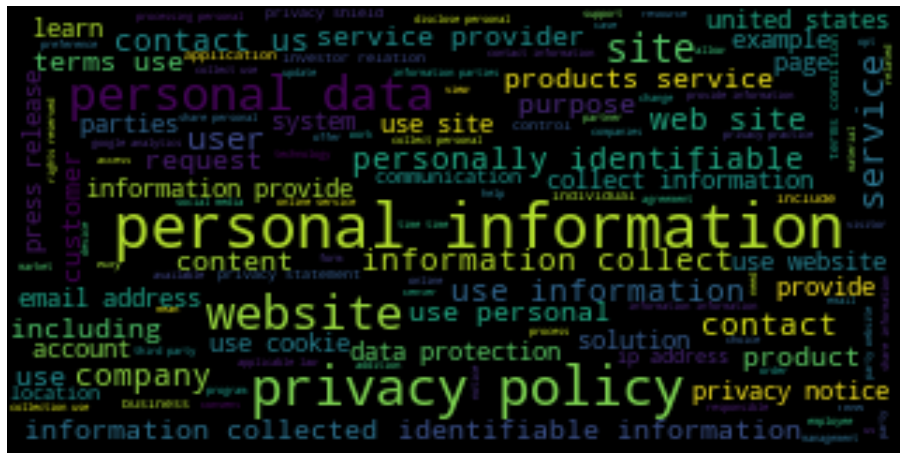

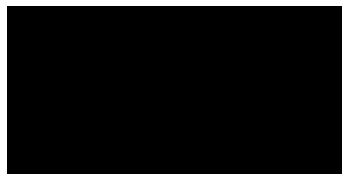

In [0]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
!pip install pyLDAvis

In [0]:

from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [0]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

In [0]:
pyLDAvis.show(zit)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]

stopping Server...
